## Get all original audio sources

In [4]:
import os

# Directory containing the wav files
wavfiles_dir = 'wavfiles'

# List to store the paths of wav files
wav_files_paths = []

# Walk through the directory to find all wav files
for root, dirs, files in os.walk(wavfiles_dir):
    for file in files:
        if file.endswith('.wav'):
            wav_files_paths.append(os.path.join(root, file))


## Import music classification model

In [3]:
import tensorflow as tf


model = tf.saved_model.load('saved')

## Predict the class of each audio source

In [11]:
import pandas as pd

# Create a DataFrame to store wav file paths and their predicted classes
wav_files_df = pd.DataFrame(columns=['file_path', 'class', 'predictions'])

wav_files_df['file_path'] = wav_files_paths
wav_files_df['class'] = wav_files_df['file_path'].apply(lambda x: x.split('/')[-2])
wav_files_df['predictions'] = wav_files_df['file_path'].apply(lambda x: model(x))


In [21]:
wav_files_df['pred_id']= wav_files_df['predictions'].apply(lambda x: x['class_ids'].numpy()[0])
wav_files_df['pred_result']= wav_files_df['predictions'].apply(lambda x: x['class_names'].numpy()[0].decode('utf-8'))
wav_files_df['probability']= wav_files_df['predictions'].apply(lambda x: x['predictions'].numpy()[0])

wav_files_df



,file_path,class,predictions,pred_result,probability,pred_id
0,wavfiles/Rumba/Media-106011.wav,Rumba,"{'predictions': ((tf.Tensor(0.1505198, shape=(...",Quickstep,"[0.1505198, 0.023958154, 0.21203096, 0.1294337...",2
1,wavfiles/Rumba/Albums-Latin_Jam4-03.wav,Rumba,"{'predictions': ((tf.Tensor(0.07575747, shape=...",Tango,"[0.07575747, 0.01710544, 0.005772815, 0.011320...",5
2,wavfiles/Rumba/Albums-AnaBelen_Veneo-03.wav,Rumba,"{'predictions': ((tf.Tensor(0.15345602, shape=...",Quickstep,"[0.15345602, 0.024888804, 0.20983556, 0.128548...",2
3,wavfiles/Rumba/Media-106010.wav,Rumba,"{'predictions': ((tf.Tensor(0.15126804, shape=...",Quickstep,"[0.15126804, 0.024113795, 0.2105907, 0.1293349...",2
4,wavfiles/Rumba/Media-103817.wav,Rumba,"{'predictions': ((tf.Tensor(0.0035300192, shap...",Waltz,"[0.0035300192, 0.00019438432, 0.003101052, 0.1...",7
...,...,...,...,...,...,...
693,wavfiles/Quickstep/Media-105716.wav,Quickstep,"{'predictions': ((tf.Tensor(0.15218893, shape=...",Quickstep,"[0.15218893, 0.024527831, 0.21007396, 0.129052...",2
694,wavfiles/Quickstep/Albums-Chrisanne3-14.wav,Quickstep,"{'predictions': ((tf.Tensor(0.021460861, shape...",Rumba,"[0.021460861, 0.0032781353, 0.120469, 0.488468...",3
695,wavfiles/Quickstep/Media-105313.wav,Quickstep,"{'predictions': ((tf.Tensor(0.06325332, shape=...",Tango,"[0.06325332, 0.0017388453, 0.0039160266, 0.033...",5
696,wavfiles/Quickstep/Albums-Chrisanne3-15.wav,Quickstep,"{'predictions': ((tf.Tensor(0.1846821, shape=(...",Quickstep,"[0.1846821, 0.031533536, 0.19651118, 0.1937126...",2


In [22]:
wav_files_df.to_csv('original_source_predictions.csv')

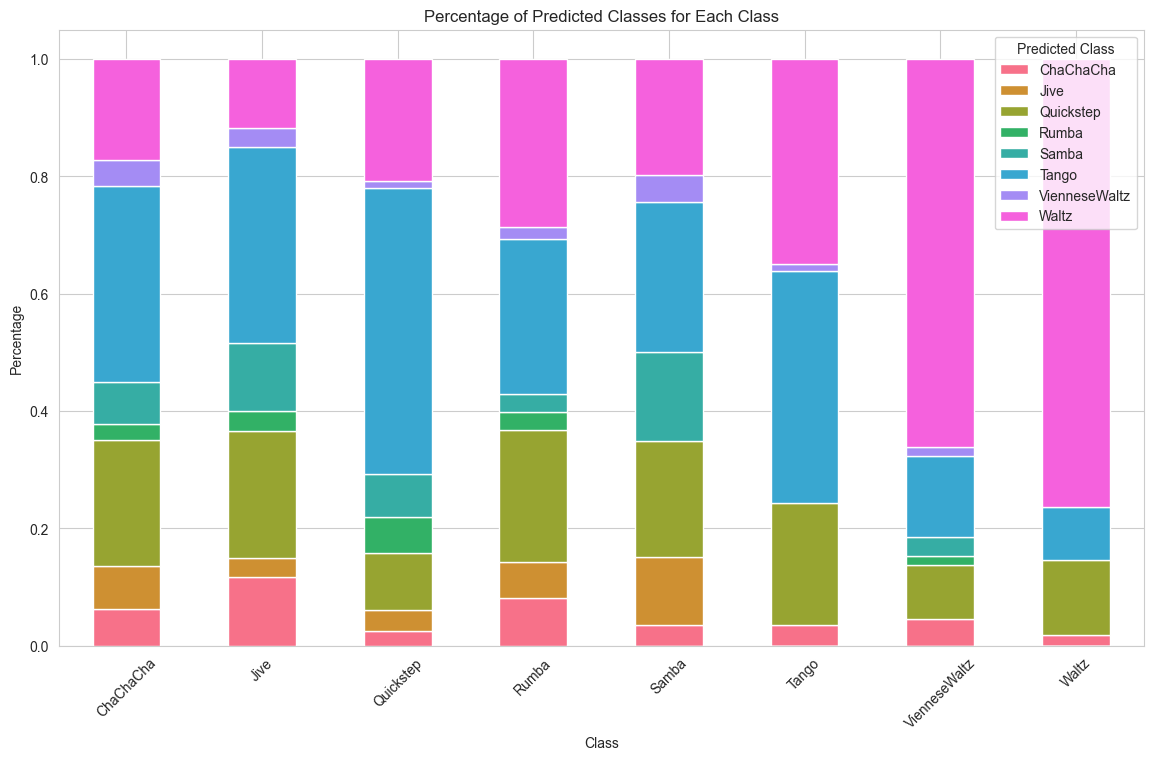

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

def plot_bar_chart_by_class(df):
    # Group by 'type' and then plot the count of 'y' values for each type
    grouped = df.groupby('class')['pred_result'].value_counts(normalize=True).unstack().fillna(0)
    colors = sns.color_palette("husl", len(grouped.columns))
    grouped.plot(kind='bar', figsize=(14, 8), stacked=True, color=colors)
    plt.title('Percentage of Predicted Classes for Each Class')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Predicted Class')
    plt.show()

# Call the function to plot the chart
plot_bar_chart_by_class(wav_files_df)


